Text = Title of the product.

In [1]:
import nltk


In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.corpus import brown

In [4]:
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [5]:
data=brown.sents(categories='editorial')[:100]
print(type(data),len(data))
print(data)
print(len(data))
# Sents will give the particular document for a category.

<class 'nltk.collections.LazySubsequence'> 100
[['Assembly', 'session', 'brought', 'much', 'good'], ['The', 'General', 'Assembly', ',', 'which', 'adjourns', 'today', ',', 'has', 'performed', 'in', 'an', 'atmosphere', 'of', 'crisis', 'and', 'struggle', 'from', 'the', 'day', 'it', 'convened', '.'], ...]
100


## NLP Pipeline
- Data collection.
- Tokenization, Stopwards Removal, Stemming.
- Building a common vocab.
- Vectorize to document
- Performing the classification/clustering problem.

#### 2. Tokenization and Stopwords Removal. 

In [6]:
text='It was a very pleasant day, the weather was cool and there were showers. I went to market to buy some fruits.'

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [8]:
sents=sent_tokenize(text)

In [9]:
print(sents)

['It was a very pleasant day, the weather was cool and there were showers.', 'I went to market to buy some fruits.']


In [10]:
word_list=word_tokenize(sents[0].lower()) # Tokenize the first sentence.
print(word_list)

['it', 'was', 'a', 'very', 'pleasant', 'day', ',', 'the', 'weather', 'was', 'cool', 'and', 'there', 'were', 'showers', '.']


### Stopwords Removal - Which does not take part in any of the text.

In [11]:
from nltk.corpus import stopwords

In [12]:
sw=set(stopwords.words('english'))

In [13]:
print(sw,len(sw))

{'t', 'out', 'ourselves', 'off', 'that', 'has', 'which', 'how', 'at', 'by', 'our', 'most', 'my', 'as', 'yourselves', 'it', "won't", 'am', "mightn't", 'couldn', "hadn't", 'no', 'in', 'for', 'ain', 'with', 'haven', 'needn', 'very', 'he', 'what', "shouldn't", 'an', 'yours', 'is', "weren't", 'have', 'whom', 'or', 'himself', "wouldn't", 'each', 'm', 'mightn', 'up', 'shan', 'until', 'his', 'been', "couldn't", 'doing', 'mustn', 'your', 'on', 'some', 'd', 'don', 'now', "didn't", 'a', 'myself', 'through', "mustn't", 'before', 'do', 'had', 'yourself', 'ours', "you'd", 'its', 'itself', 'then', 'those', 'their', 'such', 'theirs', "aren't", 'about', "don't", 'when', 'over', 'ma', 'nor', 'other', 'you', 's', 'too', 'more', 'own', "isn't", 'there', 'same', 'wasn', 'of', 'here', 'again', 'down', 'any', 'themselves', "it's", 'are', 'we', 'being', 'll', 'into', 'having', 'wouldn', 'while', 'if', 'was', 'hasn', 'me', "you've", 're', "doesn't", 'both', 'herself', 'y', 'aren', 'just', 'than', "shan't", 'di

### Filter the words from the sentence .

In [14]:
def filter_words(word_list):
    useful_words = [w for w in word_list if w not in sw]
    return useful_words

In [15]:
useful_words=filter_words(word_list)
print(useful_words)

['pleasant', 'day', ',', 'weather', 'cool', 'showers', '.']


In [16]:
from nltk.tokenize import RegexpTokenizer

In [17]:
tokenizer=RegexpTokenizer("[a-z0-9]+")

In [18]:
sents="send the 50 documents to abc,def,ghi"
print(tokenizer.tokenize(sents))

['send', 'the', '50', 'documents', 'to', 'abc', 'def', 'ghi']


## Stemming
- Process that transforms particular words into root words.
- jumping,jumps,jump,jumbed ==> jump

In [19]:
text= """The quick brown fox was seen jumping over the lazy dog from high wall. Foxes love to make jumps"""

In [20]:
word_list=tokenizer.tokenize(text.lower())
print(word_list)

['the', 'quick', 'brown', 'fox', 'was', 'seen', 'jumping', 'over', 'the', 'lazy', 'dog', 'from', 'high', 'wall', 'foxes', 'love', 'to', 'make', 'jumps']


### Types of Stemmers
- Snowball stemmer(Multilingual)
- Porter Stemmer
- Lancaster Stemmer

In [21]:
from nltk.stem.snowball import PorterStemmer, SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer

In [22]:
ps=PorterStemmer()

In [23]:
ps.stem('jumped')
ps.stem('jumping')

'jump'

In [24]:
ps.stem('lovely')

'love'

In [25]:
ps.stem('awesome')

'awesom'

In [26]:
ls=LancasterStemmer()
ls.stem('awesome')
print(ls.stem('teenager'))
print(ps.stem('teenager'))

teen
teenag


In [27]:
ss=SnowballStemmer("english")
ss.stem('lovely')

'love'

In [28]:
ss=SnowballStemmer("french")
ss.stem('courais')

'cour'

# Amazon Recommendation System Project

In [1]:
#import all the necessary packages.

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
# We have a json file which contains all information about products.
# Loading the data using pandas 'read_json' file.
data = pd.read_json('tops_fashion.json')

In [3]:
print("Number of data points: ",data.shape[0],\
      "Number of features/variables: ",data.shape[1])

Number of data points:  183138 Number of features/variables:  19


## Terminology
What is data set.
Rows and columns.
Data-points.
Feature/Variable.


In [4]:
# Each product/item has 19 featuresin the raw dataset.

data.columns # Prints column-names or feature-names.

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

OUT OF THESE 19 FEATURES WE WILL BE USING ONLY 6 FEATURES.

1. asin- (Amazon standard identification number)
2. brand- (To which the product belongs to)
3. color- (Color information of apparel, it can contain many colors as a value , example- red and black strips)
4. product_type_name- (Product of apparel , ex- TSHIRT/SHIRT)
5. medium_image_url- (url of the image)
6. Title- (Title of the product)
7. formatted_price- (price of the product)

In [5]:

data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [6]:
print("Number of data points: ",data.shape[0],\
      "Number of features/variables: ",data.shape[1])
data.head() #Print the top rows in the table.

# Colour is none because may be the info is not useful for that particular product. Example- badminton racket, here color does not indicate anything ,we go for the strength of the string and metal of the racket.
# formatted price is none because we do not want to show our competitor what is the actual price of the product.

Number of data points:  183138 Number of features/variables:  7


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


# Missing data for various features

- Cleaning of data, i.e we do not want those product which does not give us the all info like colour,formatted_price ets.
- Some information is none ,so we want to discard that information and do not want to put that data into our data frame.

In [7]:
# We have total 72 unique type of product_type_names.
print(data['product_type_name'].describe())

# 91.624 (167794/183138) of the products are shirts,

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [8]:
# Names of different product types.
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [9]:
# Find the 10 most frequent product_type_names.
product_type_count = Counter((data['product_type_name']))
(product_type_count.most_common(10))

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

### Basics stats for the feature : brand

In [10]:
# There are 10577 unique brands
# 183138-182987 - 151 missing values.
print(data["brand"].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


In [11]:
brand_count = Counter((data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [12]:
print(data['color'].describe())

# We have 7380 unique colors
# 7.2% of products are black in color
# 64956 of 183138 products have brand information. That is approx 35.4%

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [13]:
color_count = Counter(data['color'])
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

### Basics stats for the feature: formatted_price

In [14]:
data['formatted_price'].describe()

# Only 28,395(15.5% of whole data) products with price information.

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object

In [15]:
price_count = Counter(data['formatted_price'])
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

### Basics stats for the feature: title

In [16]:
data['title'].describe()

# All of the products have title .
# Titles are fairly descriptive of what the product is.
# We use titles extensively in this project as they short and informative .
# 

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object

In [17]:
data.to_pickle('180k_apparel_data')

# We save our data file at every major step in our processing in 'pickle' files. If you are stuck anywhere(or) if some codes takes too long to run on your laptop , you may use the pickle files we give you to speed things up.

In [18]:
# Consider the product which have price information data['formatted_price '].isnull-- Gives the info aboout the dataframe row's which have null values price==None(null)
data = data.loc[~data['formatted_price'].isnull()]
data.shape[0] # Prints number of data points after eliminating price=NULL.

28395

In [19]:
# Consider the product which have color info data['color'].isnull-- Gives the information about the dataframe row's which have null valu
data = data.loc[~data['color'].isnull()]
data.shape[0]

28385

#### We brought down the number of data points from 180k to 28k.
- We are processing only 28k points so that most of the participants can run this code on their higher laptops in a resonable     amount of time.
- For those of you who have powerful computers and some time to spare ,you are recommended to use all the 180k images.

In [20]:
data.to_pickle('28k_apparel_data')

In [21]:
# You can download all these 28k images using this code below.
# You do NOT need to run this code and hence it is commented.


'''
from PIL import Image
import requests
from io import BytesIO

for index, row in images.iterrows():
        url = row['large_image_url']
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img.save('images/28k_images/'+row['asin']+'.jpeg')


'''

"\nfrom PIL import Image\nimport requests\nfrom io import BytesIO\n\nfor index, row in images.iterrows():\n        url = row['large_image_url']\n        response = requests.get(url)\n        img = Image.open(BytesIO(response.content))\n        img.save('images/28k_images/'+row['asin']+'.jpeg')\n\n\n"

#### Remove near duplicate items.

Understand about duplicates.

In [22]:
# Read data from pickle file from previous stage .
data = pd.read_pickle('28k_apparel_data')

# Find number of products that have duplicate titles.
(data.duplicated('title'))             
print(sum(data.duplicated('title')))  # We have 2325 products which have same title but different color.

# 1. Eliminate shirts which are exactly same except in size(S,XL,M,L) 
# 2. Shirts exactly same except in color

2325


In [23]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
11,B001LOUGE4,Fitness Etc.,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Ladies Cotton Tank 2x1 Ribbed Tank Top,$11.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
21,B014ICEDNA,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel Short...,$7.50


In [24]:
# 1. Eliminating shirts which are exactly same except in size (S,M,L,XL)
#Remove all products with very few words in title
data_sorted = data[data['title'].apply(lambda x : len(x.split()) > 4)] # Prints after removal of products with short description.
data_sorted.shape

(27949, 7)

In [25]:
#Sort the whole data based on title (alphabetical order of title)
data_sorted.sort_values('title', inplace = True, ascending = False)
data_sorted.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


In [26]:
SOME EXAMPLE OF DUPLICATE TITLES THAT DIFFER ONLY IN THE LAST FEW WORDS I.E MAY BE DUE TO SIZE DIFF OR COLOUR DIFF BUT PRODUCT IS SAME 

SyntaxError: invalid syntax (<ipython-input-26-ebc231d07614>, line 1)

In [27]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

indices

[61973,
 133820,
 81461,
 75995,
 151570,
 152506,
 76209,
 103647,
 138588,
 95954,
 74338,
 18905,
 60078,
 59030,
 177229,
 22273,
 135865,
 171318,
 44082,
 40331,
 60603,
 56982,
 39370,
 120006,
 8424,
 139484,
 94413,
 167267,
 92382,
 93518,
 101522,
 74087,
 51286,
 35796,
 73818,
 127730,
 37902,
 164994,
 125784,
 129103,
 161966,
 151598,
 100567,
 102610,
 80880,
 74066,
 167810,
 100898,
 86604,
 153020,
 168828,
 97684,
 83173,
 37290,
 17234,
 130798,
 128762,
 38107,
 32240,
 141241,
 37911,
 142996,
 115660,
 163170,
 73633,
 132135,
 42468,
 69292,
 32217,
 169883,
 108966,
 68893,
 115422,
 141090,
 80785,
 92051,
 165541,
 150090,
 163741,
 123456,
 57588,
 116686,
 170034,
 160212,
 144984,
 142244,
 141432,
 118353,
 101884,
 110314,
 140321,
 76493,
 135579,
 85390,
 78409,
 158069,
 148089,
 100597,
 140457,
 137999,
 147641,
 94653,
 120825,
 145597,
 114795,
 98140,
 148772,
 80202,
 113184,
 79120,
 93161,
 86422,
 103918,
 157939,
 99504,
 85577,
 133860,
 

In [28]:
# This algo will be used to remove the titles which are diff only in the last 2 or 3 alphabets.
#  O(n^2) algorithm.

import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    previous_i = i
    
    a = data['title'].loc[indices[i]].split()
    
    j = i+1
    
    while j< num_data_points:
        
        b = data['title'].loc[indices[j]].split()
        
        length = max(len(a), len(b))
        
        count = 0;
        
        for k in itertools.zip_longest(a,b):
            if(k[0] == k[1]):
                count+=1
        
        if ( length-count) > 2:
            
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])
        
            if j == num_data_points-1:
                stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])
                
            i = j
            break
            
        else:
            j += 1
        
    if previous_i == i:
        break
        

In [29]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [30]:
# We removed the duplicates which differ only at the end. 
data.shape # Number of data points.

(17593, 7)

In [31]:
# 2. Shirts exactly same except color.

data.to_pickle('17k_apperal_data')

######  We are going to filter those products whose title are different but product is actually same
- Example : ladies full sleeves and women full sleeves. 

In [46]:
data = pd.read_pickle('17k_apperal_data')

In [47]:
# This code snippet takes significant amount of time.
# O(n^2) time.
# Takes about an hour to run on a decent computer. 
indices = []
for i,row in data.iterrows():
    indices.append(i)


stage2_dedupe_asins = []
while len(indices) != 0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    
    a = data['title'].loc[i].split()
    
    for j in indices:
        
        b = data['title'].loc[j].split()
        
        
        length = max(len(a), len(b))
        
        count = 0
        
        for k in itertools.zip_longest(a,b):
            if( k[0] == k[1]):
                count+=1
        
        if (length - count) < 3:
            indices.remove(j)
        

In [49]:
# From whole previous products we will consider only the products that are found in previous cell.
data=data.loc[data['asin'].isin(stage2_dedupe_asins)]

In [50]:
print('Number of data points after stage two of dedupe',data.shape[0])
# from 17k apperals we reduced to 16k apperals

Number of data points after stage two of dedupe 16435


In [51]:
data.to_pickle('16k_apperal_data')

## Text Pre-Processing

In [52]:
data = pd.read_pickle('16k_apperal_data')
# NLTK download stop words.(RUN ONLY ONCE)
#goto terminal(linux/mac) or command prompt (window),in the terminal ,type these commands
#$python3
#$import nltk
#$nltk.download

In [53]:
# We use the list of stop words which downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
print("list of stop words : ", stop_words)

def nlp_preprocessing(total_text , index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            word = ("".join(e for e in words if e.isalnum()))
            word = word.lower()
            
            if not word in stop_words:
                string += word + " "
            
        data[column][index] = string

list of stop words :  {'he', 'no', 'same', 'himself', 'does', 'did', "didn't", 'some', 'his', "shouldn't", 'you', 'before', 'under', 'more', "mightn't", "you're", "aren't", "shan't", "hasn't", 'm', 'ourselves', 'y', 'is', "should've", 'which', 'above', 'who', "she's", 'will', 'by', 'didn', 'ma', 'those', 'hasn', 'that', 'few', 'o', 'your', "you'll", 'after', 'haven', 'shan', 'because', 'wouldn', 'here', 'be', 'couldn', 'between', 're', 'other', 'their', 'just', 'how', 'than', 'd', "you've", 'been', 'needn', 'has', 'at', 'to', 'why', 'any', 'so', 'i', 'this', 'him', 'too', "mustn't", 'aren', 'myself', "weren't", 'until', 'once', 'these', 'what', 'won', 'are', 'from', 'isn', "haven't", 'do', 'if', "that'll", 'for', 'up', 'on', 'ain', 'she', 'hers', 'about', 'it', 'over', 'her', 'its', 'had', 'hadn', 'there', 'yourself', 'theirs', 'when', 'both', 'own', 'below', 'during', "hadn't", 'nor', 'am', 'while', 'being', 'out', "you'd", 'of', 'most', 'and', 'themselves', "don't", 'each', "doesn't"

In [54]:
start_time = time.clock()

for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')

print(time.clock() - start_time, " seconds")

14.547619799999666  seconds


In [55]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
46,B01NACPBG2,Fifth Degree,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,$6.95


In [56]:
data.to_pickle('16k_apperal_data_preprocessed')

## Text based product similarity

In [57]:
data = pd.read_pickle('16k_apperal_data_preprocessed')
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
46,B01NACPBG2,Fifth Degree,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,$6.95


In [58]:
#Display an image

def display_img(url, ax, fig):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    
#plotting code to understand the algo's decision
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()

def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features = title_vectorizer.fit_transform(data['title'])
title_features.shape # get number 

# number of rows i.e column and number of words in the vocabulary . And for now it is a bag of words approach.

(16435, 12684)

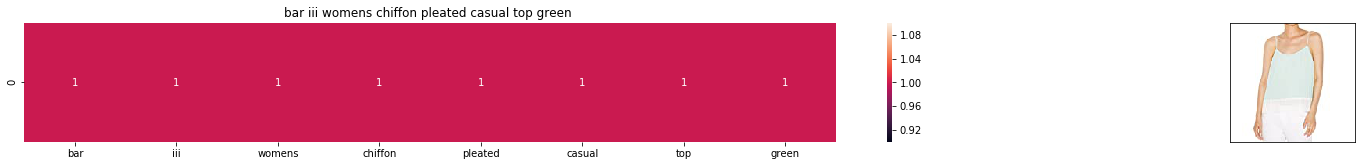

ASIN : B01CDLVBX8
Brand: Bar III
Title: bar iii womens chiffon pleated casual top green 
Euclidean similarity with the query image : 0.0


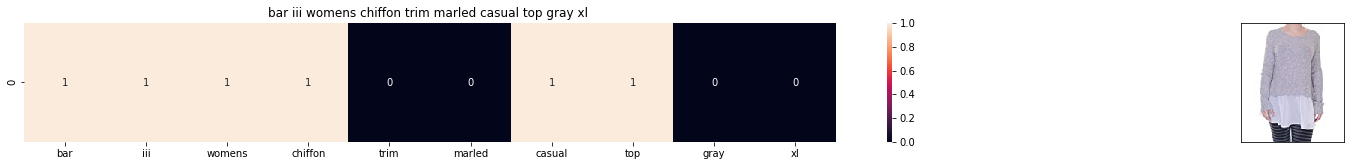

ASIN : B01BZABFIE
Brand: Bar III
Title: bar iii womens chiffon trim marled casual top gray xl 
Euclidean similarity with the query image : 2.449489742783178


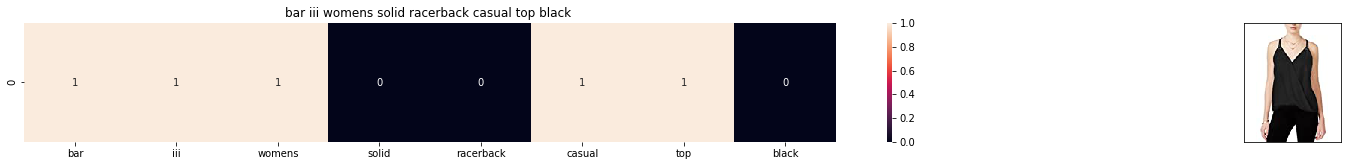

ASIN : B0724ZCX9F
Brand: Bar III
Title: bar iii womens solid racerback casual top black 
Euclidean similarity with the query image : 2.449489742783178


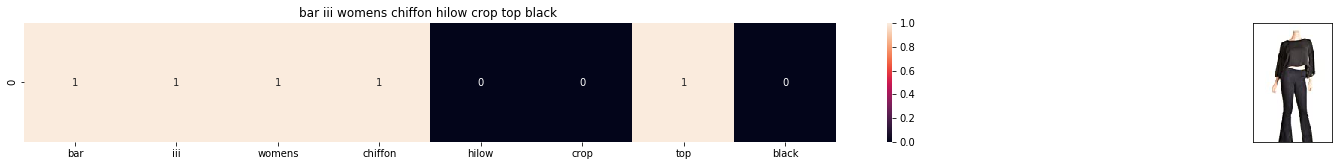

ASIN : B01BT9869M
Brand: Bar III
Title: bar iii womens chiffon hilow crop top black 
Euclidean similarity with the query image : 2.449489742783178


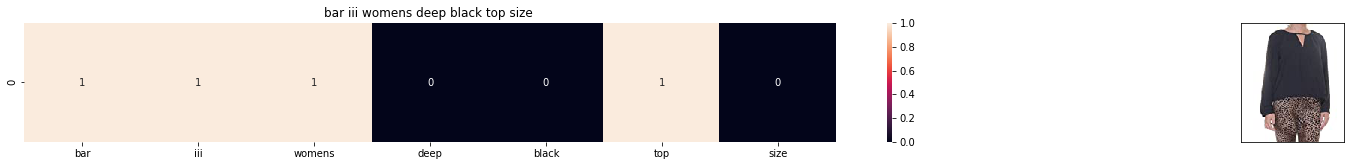

ASIN : B01N6RN4HS
Brand: Bar III
Title: bar iii womens deep black top size 
Euclidean similarity with the query image : 2.6457513110645907


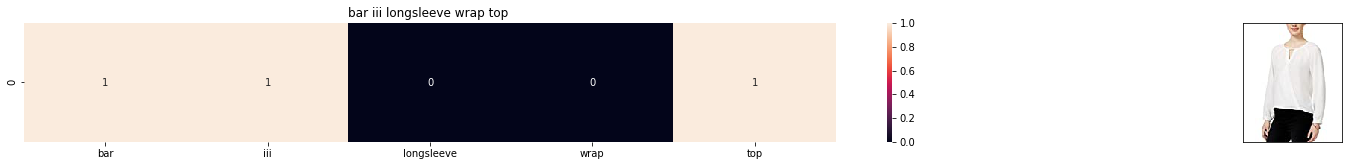

ASIN : B072LNV4RM
Brand: Bar III
Title: bar iii longsleeve wrap top 
Euclidean similarity with the query image : 2.6457513110645907


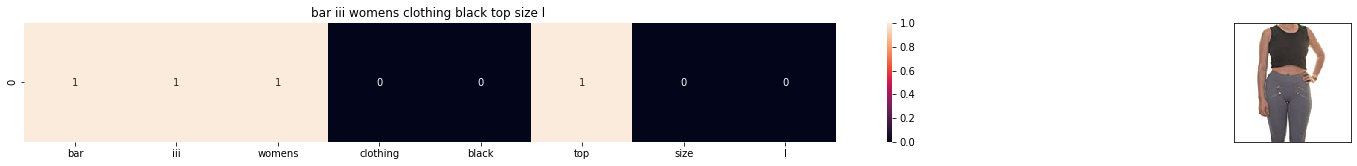

ASIN : B01KVR2YZA
Brand: Bar lll
Title: bar iii womens clothing black top size l 
Euclidean similarity with the query image : 2.6457513110645907


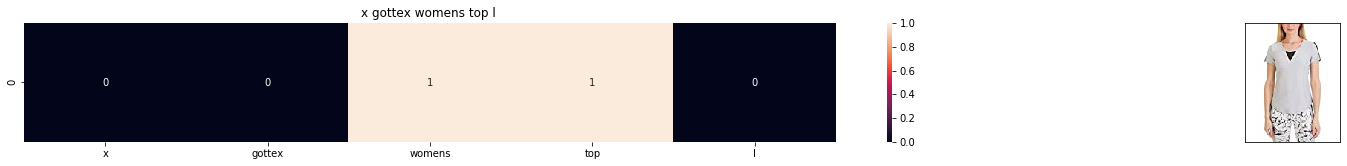

ASIN : B073M78XLP
Brand: X by Gottex
Title: x gottex womens top l 
Euclidean similarity with the query image : 2.6457513110645907


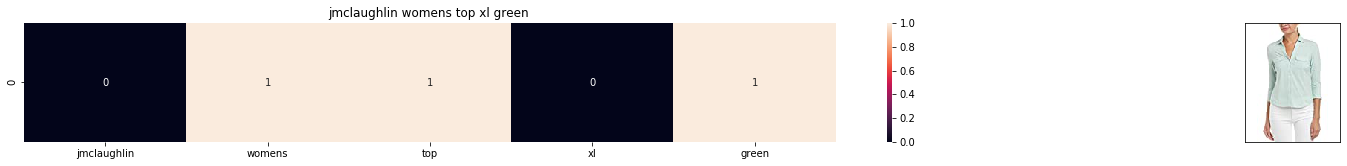

ASIN : B074KPDKMY
Brand: J. McLaughlin
Title: jmclaughlin womens top xl green 
Euclidean similarity with the query image : 2.6457513110645907


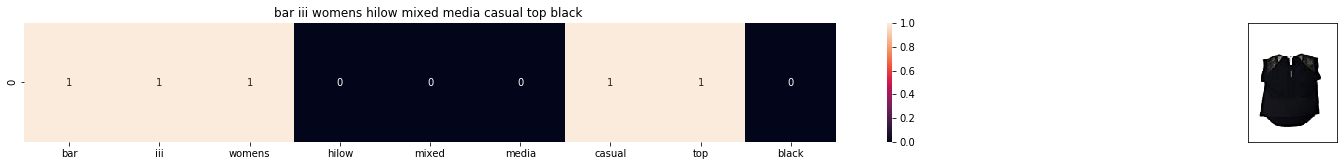

ASIN : B01LYRBHMI
Brand: Bar III
Title: bar iii womens hilow mixed media casual top black 
Euclidean similarity with the query image : 2.6457513110645907


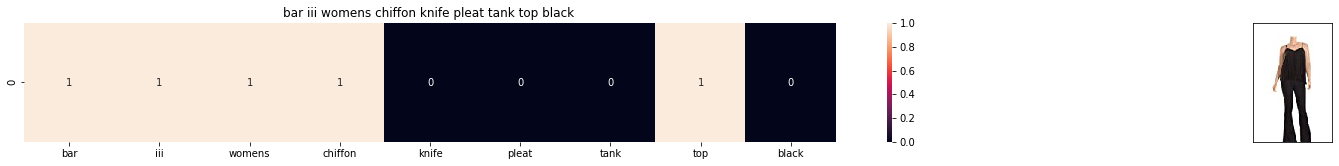

ASIN : B01GUK8EYM
Brand: Bar III
Title: bar iii womens chiffon knife pleat tank top black 
Euclidean similarity with the query image : 2.6457513110645907


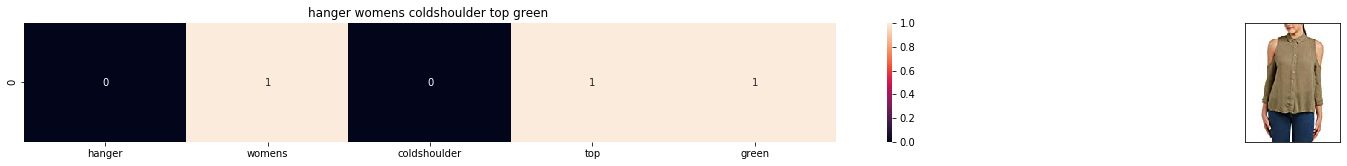

ASIN : B074F52Y28
Brand: The Hanger
Title: hanger womens coldshoulder top green 
Euclidean similarity with the query image : 2.6457513110645907


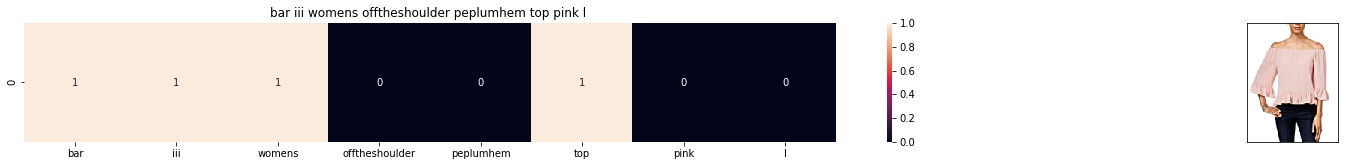

ASIN : B073HWTC1L
Brand: Bar III
Title: bar iii womens offtheshoulder peplumhem top pink l 
Euclidean similarity with the query image : 2.6457513110645907


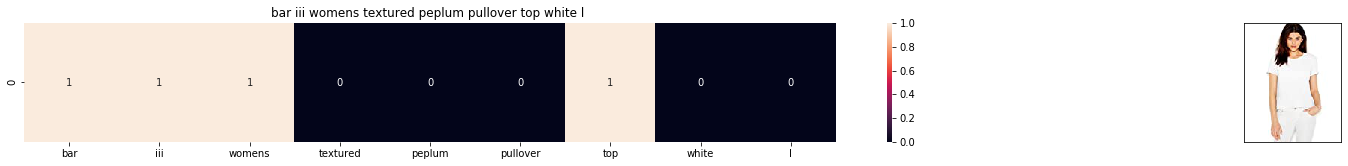

ASIN : B01EZ5PNOI
Brand: Bar III
Title: bar iii womens textured peplum pullover top white l 
Euclidean similarity with the query image : 2.8284271247461903


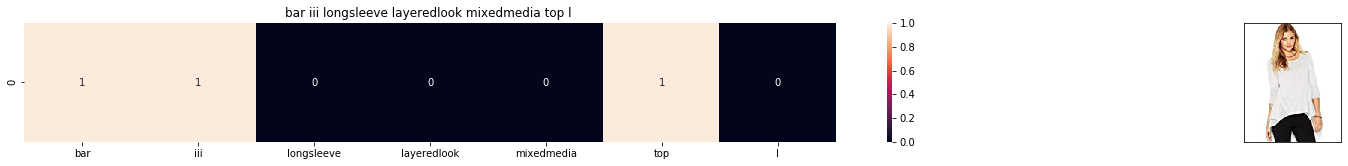

ASIN : B071SG3RT6
Brand: Bar III
Title: bar iii longsleeve layeredlook mixedmedia top l 
Euclidean similarity with the query image : 2.8284271247461903


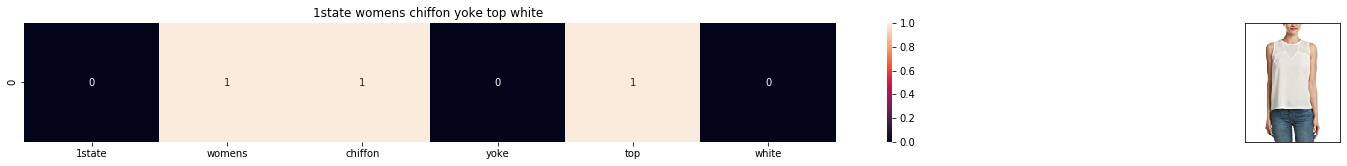

ASIN : B071YPB9P9
Brand: 1.State
Title: 1state womens chiffon yoke top white 
Euclidean similarity with the query image : 2.8284271247461903


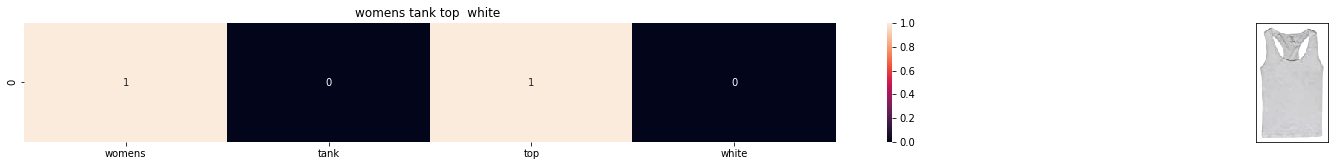

ASIN : B00JPOZ9GM
Brand: Sofra
Title: womens tank top  white 
Euclidean similarity with the query image : 2.8284271247461903


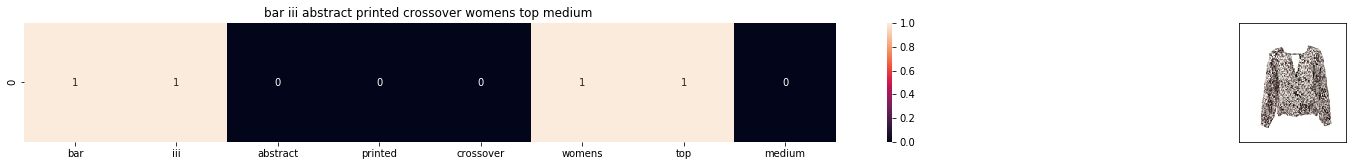

ASIN : B071JWBTBH
Brand: Bar III
Title: bar iii abstract printed crossover womens top medium 
Euclidean similarity with the query image : 2.8284271247461903


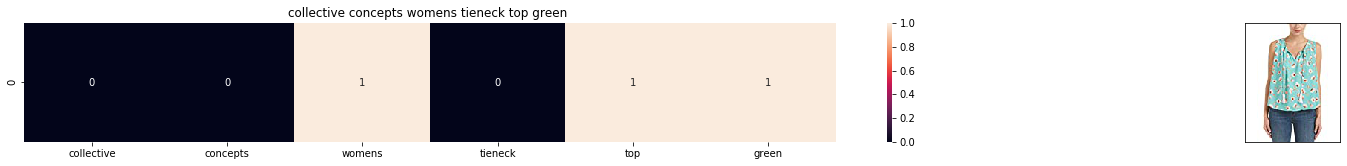

ASIN : B06Y15Y3Z7
Brand: Collective Concepts
Title: collective concepts womens tieneck top green 
Euclidean similarity with the query image : 2.8284271247461903


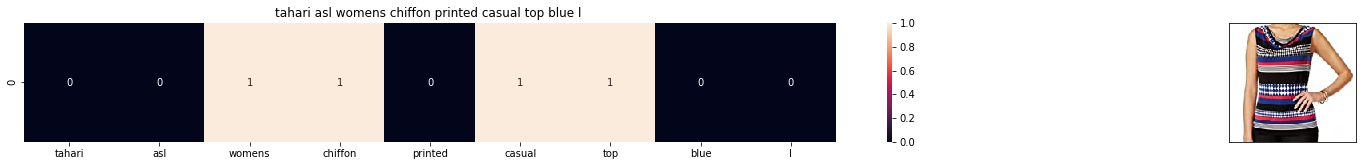

ASIN : B01M68JIFB
Brand: Tahari ASL
Title: tahari asl womens chiffon printed casual top blue l 
Euclidean similarity with the query image : 2.8284271247461903


In [60]:
def bag_of_words_model(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(title_features, title_features[doc_id]) # doc_id will give number of times word occur in doc id.
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results] # Pairwise function is provided by scikit learn.
    
    pdists = np.sort(pairwise_dist.flatten())[0:num_results]
    
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

        
        
bag_of_words_model(931, 20)   #This is count_vectorizer approach because it is giving frequency of each and every words here.
    
# We have sorted as well

In [61]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])

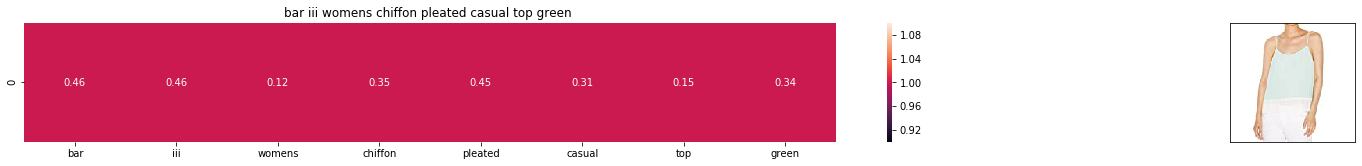

ASIN : B01CDLVBX8
BRAND : Bar III
Eucliden distance from the given image : 0.0


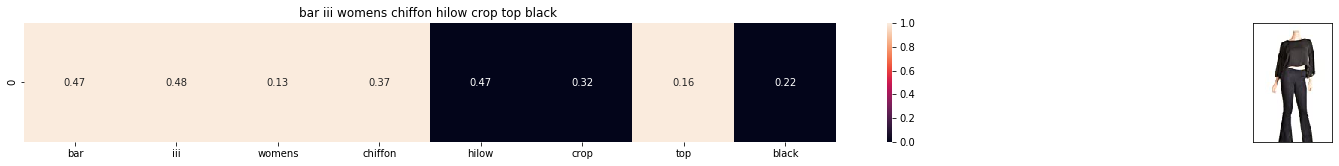

ASIN : B01BT9869M
BRAND : Bar III
Eucliden distance from the given image : 0.8851790667387737


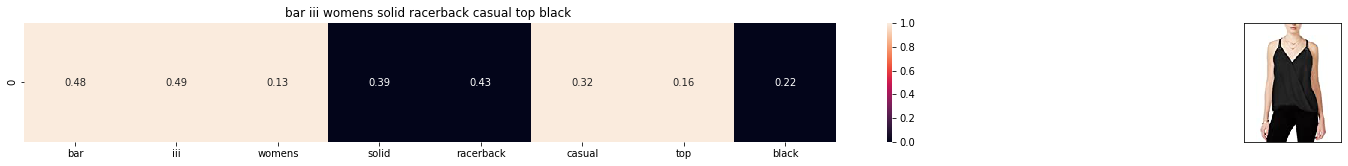

ASIN : B0724ZCX9F
BRAND : Bar III
Eucliden distance from the given image : 0.9093599127727673


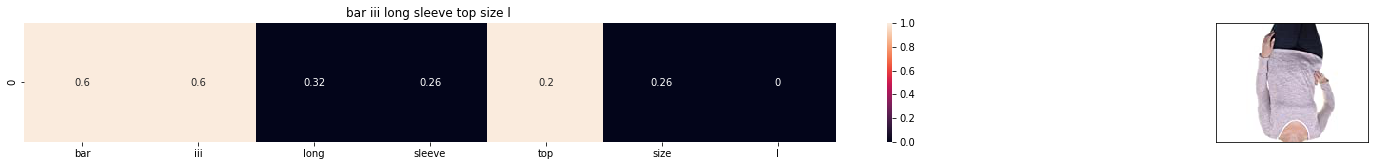

ASIN : B014V60CQ0
BRAND : Bar III
Eucliden distance from the given image : 0.9149108494974221


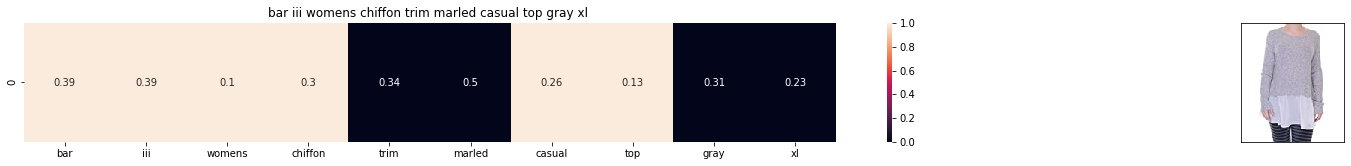

ASIN : B01BZABFIE
BRAND : Bar III
Eucliden distance from the given image : 0.9233858380403844


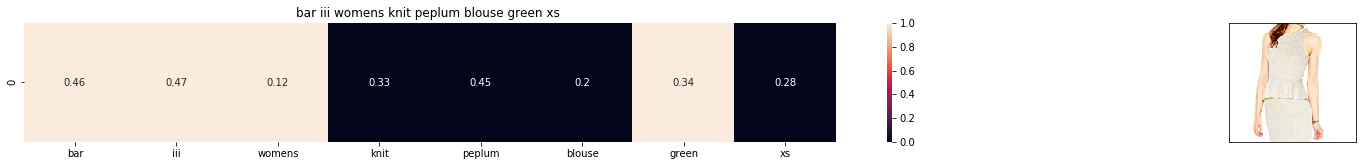

ASIN : B01AND54VS
BRAND : Bar III
Eucliden distance from the given image : 0.9368579831412406


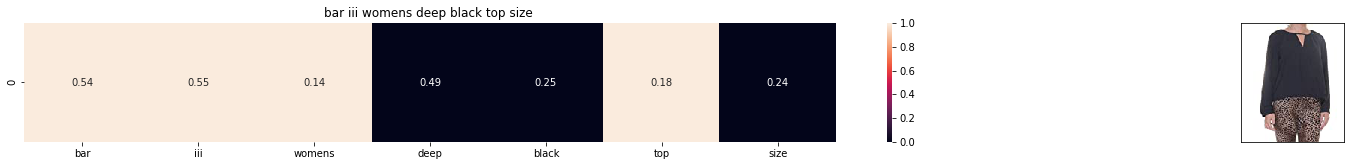

ASIN : B01N6RN4HS
BRAND : Bar III
Eucliden distance from the given image : 0.9553130127756088


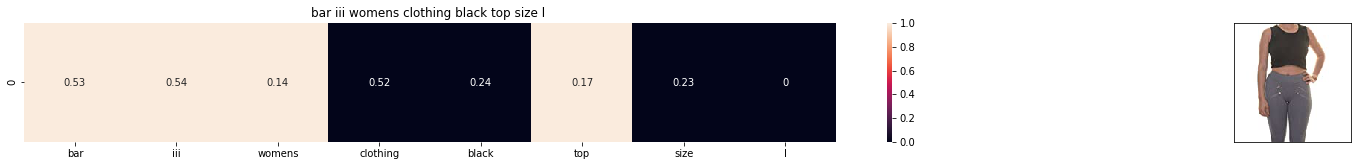

ASIN : B01KVR2YZA
BRAND : Bar lll
Eucliden distance from the given image : 0.9645461014433538


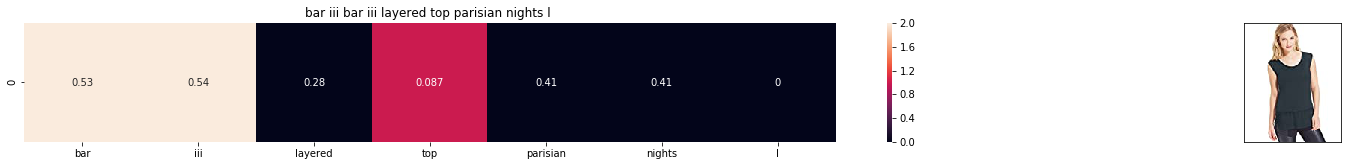

ASIN : B01KG6D1U8
BRAND : Bar lll
Eucliden distance from the given image : 0.9933235976278795


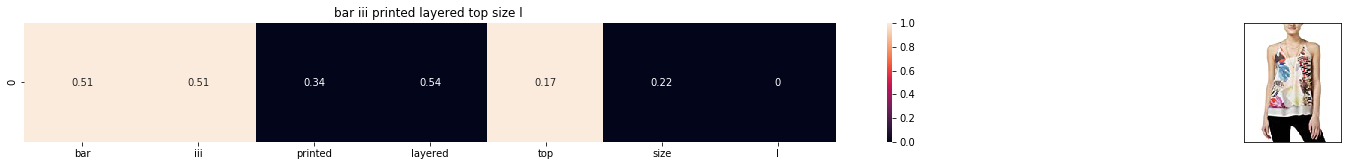

ASIN : B06XPYWQ5Y
BRAND : Bar III
Eucliden distance from the given image : 1.006127086981935


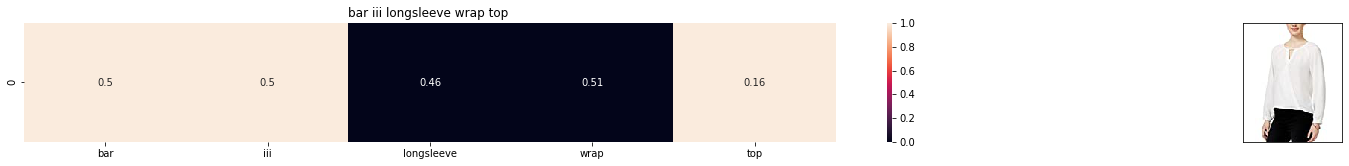

ASIN : B072LNV4RM
BRAND : Bar III
Eucliden distance from the given image : 1.0131004922576294


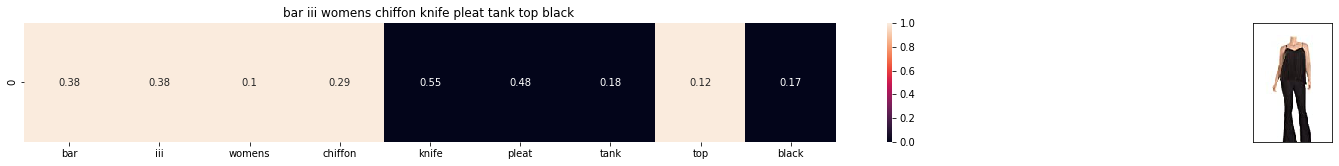

ASIN : B01GUK8EYM
BRAND : Bar III
Eucliden distance from the given image : 1.013338952568127


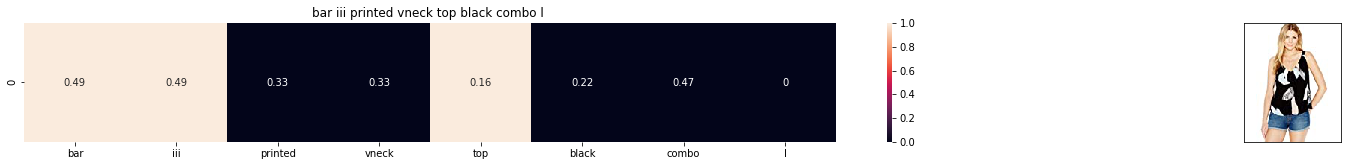

ASIN : B01KI9PNCM
BRAND : Bar lll
Eucliden distance from the given image : 1.0231987320695486


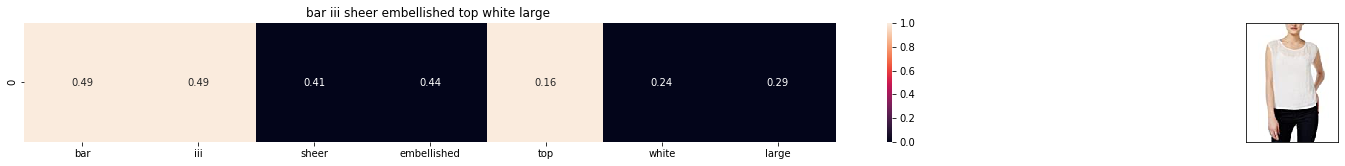

ASIN : B0727KTGH4
BRAND : Bar III
Eucliden distance from the given image : 1.0259746108766814


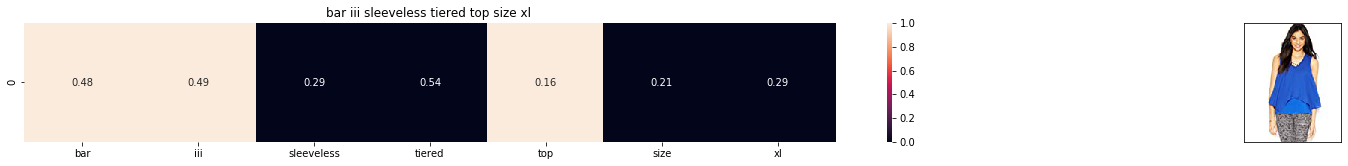

ASIN : B06XJTTHR8
BRAND : Bar III
Eucliden distance from the given image : 1.0296406995891412


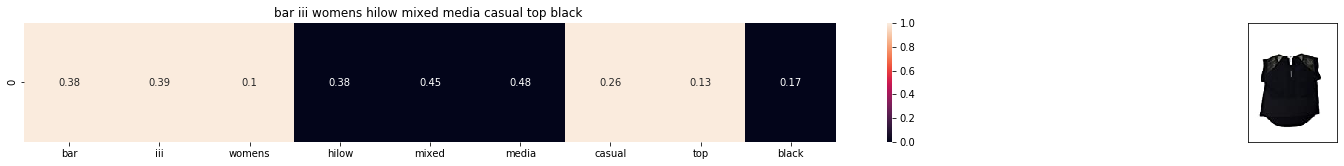

ASIN : B01LYRBHMI
BRAND : Bar III
Eucliden distance from the given image : 1.0334096925248497


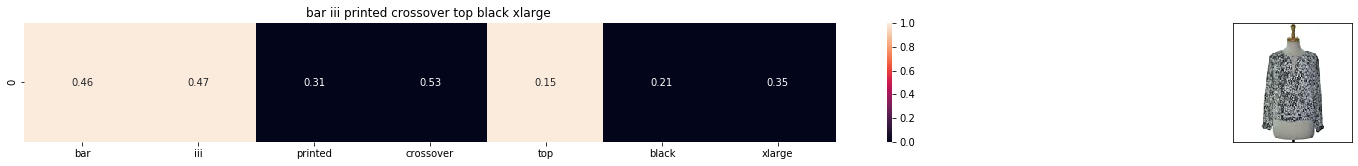

ASIN : B0751TJM3P
BRAND : Bar III
Eucliden distance from the given image : 1.0497941718020027


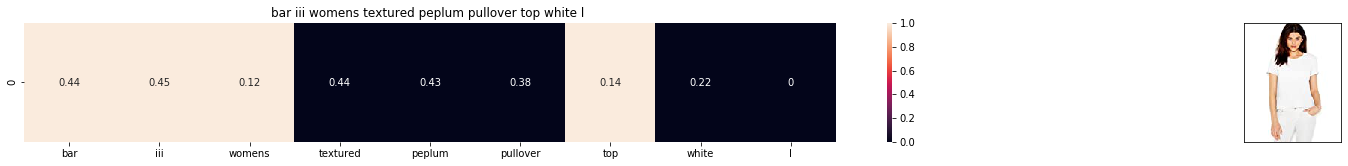

ASIN : B01EZ5PNOI
BRAND : Bar III
Eucliden distance from the given image : 1.054220995116028


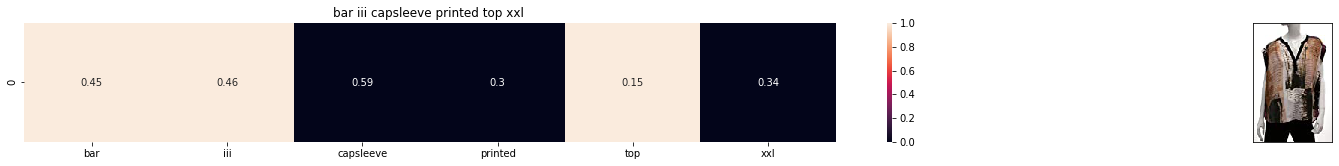

ASIN : B0716Z7N13
BRAND : Bar III
Eucliden distance from the given image : 1.0558556102475896


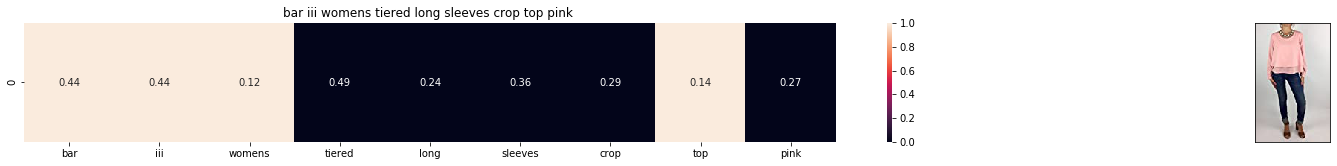

ASIN : B01DQ3AYHQ
BRAND : Bar III
Eucliden distance from the given image : 1.0576030688367164


In [62]:
def tfidf_model(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(tfidf_title_features, tfidf_title_features[doc_id])
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    pdists = np.sort(pairwise_dist.flatten())[0:num_results]
    
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
    
tfidf_model(931, 20)    